In [1]:
import pandas as pd
from great_expectations.data_context import FileDataContext
import os

print(os.getcwd())
# leave to the directory one level up
os.chdir("../")

print(os.getcwd())

C:\Users\Bod\PycharmProjects\Sum2024MLOps\notebooks
C:\Users\Bod\PycharmProjects\Sum2024MLOps


In [2]:
relative_path = 'data/samples/sample.csv'
df = pd.read_csv(relative_path)

In [3]:
df.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,15829916,1483,https://www.zameen.com/Property/d_h_a_dha_phas...,House,70000000,DHA Defence,Karachi,Sindh,24.805045,67.064323,6,16 Marla,For Sale,6,05-06-2019,Parekh Estate,Noman Charakry,Marla,16.0,15-20 Marla
1,15829917,1482,https://www.zameen.com/Property/d_h_a_dha_phas...,House,75000000,DHA Defence,Karachi,Sindh,24.810265,67.043552,5,1 Kanal,For Sale,5,05-06-2019,Parekh Estate,Noman Charakry,Kanal,1.0,1-5 Kanal
2,15829919,1482,https://www.zameen.com/Property/d_h_a_dha_phas...,House,75000000,DHA Defence,Karachi,Sindh,24.810265,67.043552,3,1 Kanal,For Sale,3,05-06-2019,Parekh Estate,Noman Charakry,Kanal,1.0,1-5 Kanal
3,15829920,1482,https://www.zameen.com/Property/d_h_a_dha_phas...,House,72500000,DHA Defence,Karachi,Sindh,24.810265,67.043552,6,1 Kanal,For Sale,6,05-06-2019,Parekh Estate,Noman Charakry,Kanal,1.0,1-5 Kanal
4,15829921,1482,https://www.zameen.com/Property/d_h_a_dha_phas...,House,80000000,DHA Defence,Karachi,Sindh,24.810265,67.043552,5,1 Kanal,For Sale,5,05-06-2019,Parekh Estate,Noman Charakry,Kanal,1.0,1-5 Kanal


<Axes: >

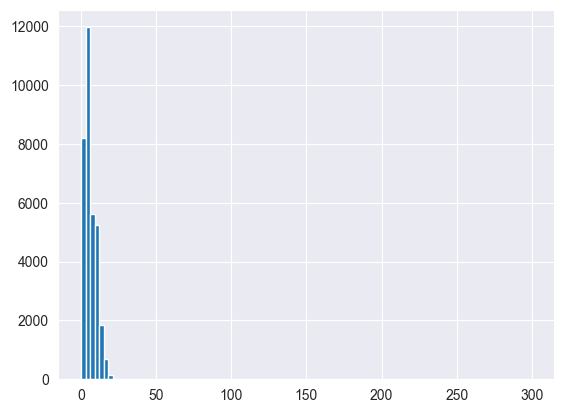

In [4]:
df['Area Size'].hist(bins=100)

In [5]:
# calculate mean and max of the price
min_price = df['price'].min()
price_25 = df['price'].quantile(0.25)
mean_price = df['price'].mean()
median_price = df['price'].median()
price_75 = df['price'].quantile(0.75)
max_price = df['price'].max()
std_dev_price = df['price'].std()
mean_price, min_price, price_25, median_price, price_75, max_price, std_dev_price

(21025884.421472885,
 0,
 2200000.0,
 10000000.0,
 23500000.0,
 2000000000,
 40784935.05001422)

In [6]:
min_area = df['Area Size'].min()
max_area = df['Area Size'].max()
print(round(min_area, 5), max_area)

0.0 300.0


In [7]:
min_baths = df['baths'].min()
max_baths = df['baths'].max()
min_bedrooms = df['bedrooms'].min()
max_bedrooms = df['bedrooms'].max()
min_baths, max_baths, min_bedrooms, max_bedrooms

(0, 13, 0, 18)

In [8]:
# count number of 0 in Area Size
df[df['Area Size'] == 0]


,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
12373,14619957,3965,https://www.zameen.com/Property/johar_town_pha...,House,12500000,Johar Town,Lahore,Punjab,31.474097,74.263802,5,0 Marla,For Sale,5,06-11-2019,Siddique Associates & Builders,Hamza Malik,Marla,0.0,0-5 Marla


In [9]:
# count percentage of Null values in agency
df['agency'].isnull().sum() / len(df) * 100, df['agent'].isnull().sum() / len(df) * 100

(13.108136186885927, 13.108136186885927)

<Axes: ylabel='Frequency'>

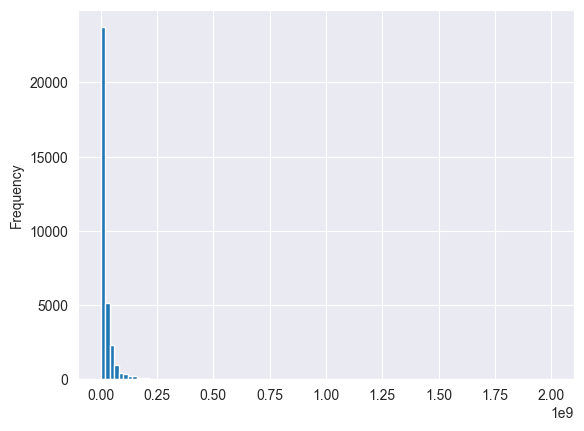

In [10]:
# plot the price distribution
df['price'].plot.hist(bins=100)

In [11]:
# count number of price == 0
df[df['price'] == 0]

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
30291,16786134,12395,https://www.zameen.com/Property/karachi_gadap_...,Farm House,0,Gadap Road,Karachi,Sindh,25.053956,67.253365,0,8 Kanal,For Sale,0,06-21-2019,Bin Anus Real Estate,M. Humayun Jokhio,Kanal,8.0,5-10 Kanal


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33689 entries, 0 to 33688
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_id    33689 non-null  int64  
 1   location_id    33689 non-null  int64  
 2   page_url       33689 non-null  object 
 3   property_type  33689 non-null  object 
 4   price          33689 non-null  int64  
 5   location       33689 non-null  object 
 6   city           33689 non-null  object 
 7   province_name  33689 non-null  object 
 8   latitude       33689 non-null  float64
 9   longitude      33689 non-null  float64
 10  baths          33689 non-null  int64  
 11  area           33689 non-null  object 
 12  purpose        33689 non-null  object 
 13  bedrooms       33689 non-null  int64  
 14  date_added     33689 non-null  object 
 15  agency         29273 non-null  object 
 16  agent          29273 non-null  object 
 17  Area Type      33689 non-null  object 
 18  Area S

In [13]:
# find distinct property types
df['property_type'].unique()

array(['House', 'Flat', 'Lower Portion', 'Upper Portion', 'Penthouse',
       'Farm House', 'Room'], dtype=object)

In [14]:
df['agency'].unique()

array(['Parekh Estate', 'A. A Associates', 'Civic Estate', ...,
       'Khizra Estate', 'Mansoor Estate Advisor',
       'New Al Haseeb Estate Advisor & Builders'], dtype=object)

In [15]:
df.nunique()

property_id      33689
location_id       2692
page_url         33689
property_type        7
price             1095
location           961
city                 5
province_name        3
latitude          3043
longitude         3131
baths               13
area               267
purpose              2
bedrooms            17
date_added          26
agency            3467
agent             5182
Area Type            2
Area Size          204
Area Category       15
dtype: int64

In [16]:
df['area'].unique()

array(['16 Marla', '1 Kanal', '10 Marla', '4.8 Marla', '4 Kanal',
       '1.2 Kanal', '5.2 Marla', '10.6 Marla', '4.4 Marla', '3.4 Marla',
       '12.4 Marla', '12.5 Marla', '11 Marla', '5.8 Marla', '9.8 Marla',
       '8.6 Marla', '8 Marla', '5 Marla', '12 Marla', '4.2 Marla',
       '1.6 Kanal', '4.9 Marla', '15 Marla', '5.7 Marla', '13.3 Marla',
       '15.9 Marla', '4 Marla', '6 Marla', '4.5 Marla', '2.2 Kanal',
       '6.3 Marla', '6.4 Marla', '4.7 Marla', '17.2 Marla', '3.3 Marla',
       '5.6 Marla', '12.9 Marla', '1.8 Marla', '10.4 Marla', '3.2 Marla',
       '3.6 Marla', '3 Marla', '7.1 Marla', '6.1 Marla', '2.6 Marla',
       '2.4 Marla', '3.1 Marla', '2.2 Marla', '6.2 Marla', '5.3 Marla',
       '7.6 Marla', '6.7 Marla', '2.9 Marla', '9.6 Marla', '2.8 Marla',
       '1.2 Marla', '9.3 Marla', '7.9 Marla', '10.2 Marla', '2 Kanal',
       '7 Marla', '7.2 Marla', '11.6 Marla', '12.7 Marla', '14 Marla',
       '2 Marla', '9.1 Marla', '7.8 Marla', '8.9 Marla', '8.4 Marla',
       

In [17]:
context = FileDataContext(context_root_dir = "services/gx")
context

{
  "anonymous_usage_statistics": {
    "enabled": true,
    "usage_statistics_url": "https://stats.greatexpectations.io/great_expectations/v1/usage_statistics",
    "data_context_id": "0130baae-afdd-427c-9cf0-7472caa4256b",
    "explicit_id": true,
    "explicit_url": false
  },
  "checkpoint_store_name": "checkpoint_store",
  "config_variables_file_path": "uncommitted/config_variables.yml",
  "config_version": 3.0,
  "data_docs_sites": {
    "local_site": {
      "class_name": "SiteBuilder",
      "show_how_to_buttons": true,
      "store_backend": {
        "class_name": "TupleFilesystemStoreBackend",
        "base_directory": "uncommitted/data_docs/local_site/"
      },
      "site_index_builder": {
        "class_name": "DefaultSiteIndexBuilder"
      }
    }
  },
  "datasources": {},
  "evaluation_parameter_store_name": "evaluation_parameter_store",
  "expectations_store_name": "expectations_store",
  "fluent_datasources": {},
  "include_rendered_content": {
    "expectation_suit

In [18]:
from pathlib import Path

ds = context.sources.add_or_update_pandas(name="first_ds")

da = ds.add_csv_asset(
    name = "asset01",
    filepath_or_buffer="data/samples/sample.csv",

)

In [19]:
batch_request = da.build_batch_request()

batches = da.get_batch_list_from_batch_request(batch_request)


In [20]:
# use head to get the first 5 rows
data_asset = context.get_datasource("first_ds").get_asset("asset01")
batch_request = data_asset.build_batch_request()

In [21]:
# create expectations
context.add_or_update_expectation_suite("first_phase_expectation_suite")
context.list_expectation_suite_names()


['first_phase_expectation_suite']

In [22]:
# Create a validator
validator = context.get_validator(
    batch_request=batch_request,
    expectation_suite_name="first_phase_expectation_suite",
)
print(validator.head())


Calculating Metrics:   0%|          | 0/1 [00:00<?, ?it/s]

   property_id  location_id  \
0     15829916         1483   
1     15829917         1482   
2     15829919         1482   
3     15829920         1482   
4     15829921         1482   

                                            page_url property_type     price  \
0  https://www.zameen.com/Property/d_h_a_dha_phas...         House  70000000   
1  https://www.zameen.com/Property/d_h_a_dha_phas...         House  75000000   
2  https://www.zameen.com/Property/d_h_a_dha_phas...         House  75000000   
3  https://www.zameen.com/Property/d_h_a_dha_phas...         House  72500000   
4  https://www.zameen.com/Property/d_h_a_dha_phas...         House  80000000   

      location     city province_name   latitude  longitude  baths      area  \
0  DHA Defence  Karachi         Sindh  24.805045  67.064323      6  16 Marla   
1  DHA Defence  Karachi         Sindh  24.810265  67.043552      5   1 Kanal   
2  DHA Defence  Karachi         Sindh  24.810265  67.043552      3   1 Kanal   
3  DHA Defen

In [23]:
# create expectations
# 7 most important features:
#  price, location, area, agency, baths, bedrooms, property_type
# 3 most important dimensions per each
ex_number_of_rows = validator.expect_table_row_count_to_be_between(min_value=33689, max_value=168446)

Calculating Metrics:   0%|          | 0/1 [00:00<?, ?it/s]

In [24]:
assert ex_number_of_rows['success']

In [25]:
# price
ex_price_completeness = validator.expect_column_values_to_not_be_null(
	column="price", 
    meta = {"dimension": "Completeness"}
)

ex_price_validity = validator.expect_column_values_to_be_of_type(
    column="price", 
    type_="int64", 
    meta = {"dimension": "Validity"}
)

ex_price_accuracy = validator.expect_column_min_to_be_between(
    column="price", 
    min_value=0, 
    meta = {"dimension": "Accuracy"}
)

price_25 = 120000.0
price75 = 19800000.0
ex_price_timelessness = validator.expect_column_median_to_be_between(
    column="price", 
    min_value=price_25, 
    max_value=price_75, 
    meta = {"dimension": "Timelessness"}
)

Calculating Metrics:   0%|          | 0/6 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/1 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/4 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/4 [00:00<?, ?it/s]

In [26]:
assert ex_price_completeness['success']
assert ex_price_validity['success']
assert ex_price_accuracy['success']
assert ex_price_timelessness['success']

In [27]:
# list of known locations
list_of_known_locations = df['location'].unique()
list_of_known_locations = [str(location) for location in list_of_known_locations if str(location) != 'nan']

In [28]:
# location
ex_location_completeness = validator.expect_column_values_to_not_be_null(
    column="location", 
    meta = {"dimension": "Completeness"}
)

ex_location_validity = validator.expect_column_values_to_be_of_type(
    column="location", 
    type_="str", 
    meta = {"dimension": "Validity"}
)


ex_location_uniqueness = validator.expect_column_unique_value_count_to_be_between(
    column="location", 
    min_value=800, 
    max_value=1500, 
    meta = {"dimension": "Uniqueness"}
)

Calculating Metrics:   0%|          | 0/6 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/4 [00:00<?, ?it/s]

In [29]:
assert ex_location_completeness['success']
assert ex_location_validity['success']
assert ex_location_uniqueness['success']

In [30]:
import re
regex = r"^[0-9]+\s*(Kanal|Marla)$"
example = "1 Kanal"
assert re.match(regex, example)

In [31]:
# area
ex_area_completeness = validator.expect_column_values_to_not_be_null(
    column="area", 
    meta = {"dimension": "Completeness"}
)

ex_area_validity = validator.expect_column_values_to_match_regex(
    column="area", 
    # format = {number} {unit}
    regex=r"^[0-9]+(\.[0-9])?\s*(Kanal|Marla)$",
    meta = {"dimension": "Validity"}
)

# value of area should be greater than 0
ex_area_accuracy = validator.expect_column_min_to_be_between(
    column="Area Size", 
    min_value=0, 
    meta = {"dimension": "Accuracy"}
)

Calculating Metrics:   0%|          | 0/6 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/4 [00:00<?, ?it/s]

In [32]:
assert ex_area_completeness['success']
assert ex_area_validity['success']
assert ex_area_accuracy['success']

In [33]:
list_of_known_agencies = df['agency'].unique()
list_of_known_agencies = [str(agency) for agency in list_of_known_agencies if str(agency) != 'nan']

In [34]:
ex_agency_uniqueness = validator.expect_column_unique_value_count_to_be_between(
    column="agency", 
    min_value=3000, 
    max_value=4000, 
    meta = {"dimension": "Uniqueness"}
)


ex_agency_validity = validator.expect_column_values_to_be_of_type(
    column="agency", 
    type_="str", 
    meta = {"dimension": "Validity"}
)

ex_agency_completeness = validator.expect_column_values_to_not_be_null(
    column="agency", 
    mostly=0.5,
    meta = {"dimension": "Completeness"}
)
    

Calculating Metrics:   0%|          | 0/4 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/6 [00:00<?, ?it/s]

In [35]:
assert ex_agency_uniqueness['success']
assert ex_agency_validity['success']
assert ex_agency_completeness['success']

In [36]:
# baths
ex_baths_accuracy = validator.expect_column_min_to_be_between(
    column="baths", 
    min_value=0, 
    meta = {"dimension": "Accuracy"}
)

ex_baths_validity = validator.expect_column_values_to_be_of_type(
    column="baths", 
    type_="int64", 
    meta = {"dimension": "Validity"}
)

ex_baths_timelessness = validator.expect_column_max_to_be_between(
    column="baths", 
    max_value=15, 
    meta = {"dimension": "Timelessness"}
)

Calculating Metrics:   0%|          | 0/4 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/1 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/4 [00:00<?, ?it/s]

In [37]:
assert ex_baths_accuracy['success']
assert ex_baths_validity['success']
assert ex_baths_timelessness['success']

In [38]:
# bedrooms
ex_bedrooms_accuracy = validator.expect_column_min_to_be_between(
    column="bedrooms", 
    min_value=0, 
    meta = {"dimension": "Accuracy"}
)

ex_bedrooms_validity = validator.expect_column_values_to_be_of_type(
    column="bedrooms", 
    type_="int64", 
    meta = {"dimension": "Validity"}
)

ex_bedrooms_timelessness = validator.expect_column_max_to_be_between(
    column="bedrooms", 
    max_value=18, 
    meta = {"dimension": "Consistency"}
)

Calculating Metrics:   0%|          | 0/4 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/1 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/4 [00:00<?, ?it/s]

In [39]:
assert ex_bedrooms_accuracy['success']
assert ex_bedrooms_validity['success']
assert ex_bedrooms_timelessness['success']

In [40]:
# property_type

ex_property_type_timelessness_and_consistency_and_validity = validator.expect_column_distinct_values_to_be_in_set(
    column="property_type", 
    value_set=["House", "Penthouse", "Flat", "Farm House", "Upper Portion", "Lower Portion", "Room"],
    meta = {"dimension": "Timelessness and Consistency and Validity"}
)

ex_property_type_completeness = validator.expect_column_values_to_not_be_null(
    column="property_type", 
    meta = {"dimension": "Completeness"}
)

ex_property_type_uniqueness = validator.expect_column_unique_value_count_to_be_between(
    column="property_type", 
    min_value=5, 
    max_value=9, 
    meta = {"dimension": "Uniqueness"}
)



Calculating Metrics:   0%|          | 0/4 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/6 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/4 [00:00<?, ?it/s]

In [41]:
assert ex_property_type_timelessness_and_consistency_and_validity['success']
assert ex_property_type_completeness['success']
assert ex_property_type_uniqueness['success']

In [42]:

validator.save_expectation_suite(
	discard_failed_expectations = False
)

In [43]:
# create a checkpoint to validate the data

checkpoint = context.add_or_update_checkpoint(
    name="first_phase_checkpoint",
    validations=[ # A list of validations
        {
            "batch_request": batch_request,
            "expectation_suite_name": "first_phase_expectation_suite",
        },
    ],
)

In [44]:
# validate the data
results = checkpoint.run()

Calculating Metrics:   0%|          | 0/54 [00:00<?, ?it/s]

In [45]:
results.success

True

In [46]:
# Build the data docs (website files)
context.build_data_docs()

# Open the data docs in a browser
context.open_data_docs()

In [47]:
retrieved_checkpoint = context.get_checkpoint(name="first_phase_checkpoint")